In [2]:
import numpy as np
import gym
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

In [3]:
env = gym.make('FrozenLake-v0')

In [4]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

learning_rate = 0.85
dis = .99
num_episodes = 2000

In [8]:

rList = []

for i in range(num_episodes) :
    state = env.reset()
    rAll = 0
    done = False
    e = 1./ ((i// 100) +1 )  #decaying E- greedy
    while not done :
        action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n) / (i+1))  
        new_state , reward , done , _ = env.step(action)
        
        Q[state, action] = (1-learning_rate) * Q[state,action] + learning_rate * (reward + dis * np.max(Q[new_state, :]))  # discounted reward
        
        rAll += reward
        state = new_state
    rList.append(rAll)    

Succes rate : 0.531
Final Q-Table Values
[[5.32647594e-02 7.14325613e-02 5.61093504e-01 7.60460586e-02]
 [4.45457563e-02 1.67620997e-03 1.53472425e-03 3.72498143e-01]
 [4.98686630e-02 6.12690239e-02 2.19156518e-02 2.27909584e-01]
 [3.69405356e-02 7.11252159e-03 5.01393472e-02 1.71601102e-01]
 [6.89783286e-01 3.55360480e-04 2.02816730e-02 1.97273738e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.28934562e-02 1.00778937e-09 6.24357619e-04 1.63729629e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.73684886e-02 6.03985442e-03 4.48663174e-03 4.88818701e-01]
 [5.82584315e-03 8.50908983e-01 2.12874447e-03 3.68046040e-03]
 [8.07866259e-01 1.86903042e-04 4.51534133e-04 1.95226361e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.81118801e-02 6.38721332e-02 9.67686997e-01 2.02076519e-02]
 [8.65329729e-02 9.61314380e-01 1.50876486e-01 2.13687865e-01]
 [0.00000000e+

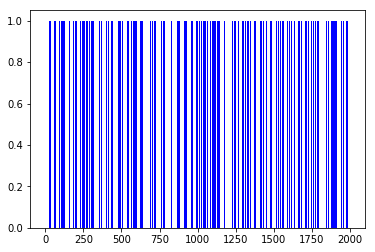

In [10]:
print("Succes rate : " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList , color = 'blue')
plt.show()